Data from https://www.kaggle.com/meganrisdal/la-county-restaurant-inspections-and-violations/data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
inspections = pd.read_csv('~/Development/Thinkful/Unit-1/Unit1_Capstone/la-county-restaurant-inspections-and-violations/inspections.csv')

violations = pd.read_csv('~/Development/Thinkful/Unit-1/Unit1_Capstone/la-county-restaurant-inspections-and-violations/violations.csv')

## Inspections

In [4]:
inspections.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


In [5]:
inspections.describe()

,program_element_pe,score,service_code
count,191371.000000,191371.000000,191371.000000
mean,1629.888980,93.753306,7.078246
std,9.391426,3.845518,48.932257
min,1610.000000,54.000000,1.000000
25%,1631.000000,91.000000,1.000000
50%,1632.000000,94.000000,1.000000
75%,1635.000000,97.000000,1.000000
max,1641.000000,100.000000,401.000000


### Type of Inspection

In [6]:
inspections.groupby('service_description').describe()

program_element_pe                         \
                                              count         mean       std   
service_description                                                          
OWNER INITIATED ROUTINE INSPECT.             2908.0  1633.965612  6.085294   
ROUTINE INSPECTION                         188463.0  1629.826077  9.419566   

                                                                          \
                                     min     25%     50%     75%     max   
service_description                                                        
OWNER INITIATED ROUTINE INSPECT.  1610.0  1632.0  1635.0  1638.0  1641.0   
ROUTINE INSPECTION                1610.0  1631.0  1632.0  1635.0  1641.0   

                                     score             ...                 \
                                     count       mean  ...     75%    max   
service_description                                    ...                  
OWNER INITIATED ROUTINE INSPECT.    2908.0  92.982118  ...    95.0  100.0   
ROUTINE INSPECTION                188463.0  93.765206  ...    97.0  100.0   

                                 service_code                            \
                                        count   mean  std    min    25%   
service_description                                                       
OWNER INITIATED ROUTINE INSPECT.       2908.0  401.0  0.0  401.0  401.0   
ROUTINE INSPECTION                   188463.0    1.0  0.0    1.0    1.0   

                                                       
                                    50%    75%    max  
service_description                                    
OWNER INITIATED ROUTINE INSPECT.  401.0  401.0  401.0  
ROUTINE INSPECTION                  1.0    1.0    1.0  

[2 rows x 24 columns]

### Scores by Business Type

In [30]:
#aggregate descriptions to new business column
inspections['business'] = 'other'
inspections.loc[inspections['pe_description'].str.contains("RESTAURANT", na=False), 'business'] = 'restaurant'
inspections.loc[inspections['pe_description'].str.contains("RETAIL", na=False), 'business'] = 'retail'

restaurants = inspections.loc[inspections.business == 'restaurant']
retail = inspections.loc[inspections.business == 'retail']

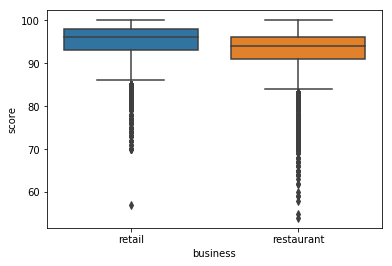

In [8]:
sns.boxplot(x="business", y="score", data=inspections);

Both business types most frequently score 'A' grades.  Retail business tend to score better than restaurants, so let's look at restaurants.

### Restaurant Scores less than 'A'

In [33]:
badInspections = restaurants.loc[restaurants['score'] < 90]

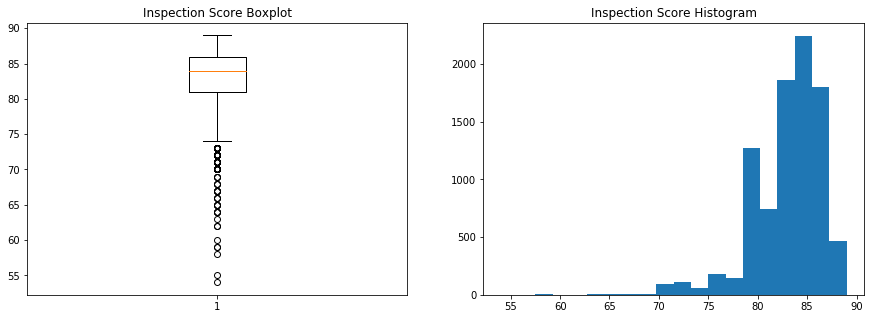

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(badInspections['score'].dropna(how = 'any'))
plt.title('Inspection Score Boxplot')

plt.subplot(1, 2, 2)
plt.hist(badInspections['score'].dropna(how = 'any'), bins=20)
plt.title('Inspection Score Histogram')

plt.show()

Scores under an 'A' mostly pass, failing grades are outliers.  Let's focus on those passing grades that are below an 'A'

### Passing inspection score below A

In [14]:
bcInspections = badInspections.loc[badInspections['score'] > 70]

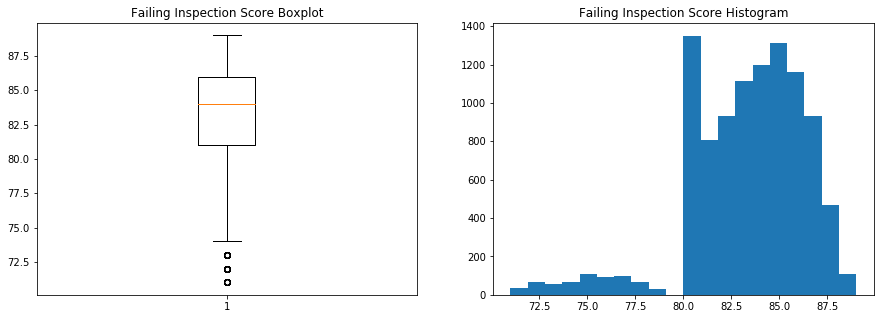

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(bcInspections['score'].dropna(how = 'any'))
plt.title('Failing Inspection Score Boxplot')

plt.subplot(1, 2, 2)
plt.hist(bcInspections['score'].dropna(how = 'any'), bins=20)
plt.title('Failing Inspection Score Histogram')

plt.show()

### Location

In [35]:
bcInspections.groupby('facility_zip').describe()

program_element_pe                                           \
                          count         mean        std     min      25%   
facility_zip                                                               
90001                      49.0  1626.306122   9.755776  1610.0  1612.00   
90001-1644                  1.0  1610.000000        NaN  1610.0  1610.00   
90001-3317                  1.0  1632.000000        NaN  1632.0  1632.00   
90001-3826                  1.0  1610.000000        NaN  1610.0  1610.00   
90002                       6.0  1622.000000  10.256705  1612.0  1612.50   
90002-1334                  1.0  1610.000000        NaN  1610.0  1610.00   
90002-3320                  1.0  1610.000000        NaN  1610.0  1610.00   
90003                      67.0  1626.492537   9.747374  1610.0  1612.00   
90003-1131                  2.0  1632.000000   0.000000  1632.0  1632.00   
90003-1216                  7.0  1612.000000   0.000000  1612.0  1612.00   
90003-1284                  1.0  1632.000000        NaN  1632.0  1632.00   
90003-1636                  1.0  1632.000000        NaN  1632.0  1632.00   
90003-1841                  3.0  1618.666667  11.547005  1612.0  1612.00   
90003-1844                  3.0  1632.000000   0.000000  1632.0  1632.00   
90003-2718                  2.0  1611.000000   0.000000  1611.0  1611.00   
90003-3123                  1.0  1632.000000        NaN  1632.0  1632.00   
90003-4043                  1.0  1612.000000        NaN  1612.0  1612.00   
90003-4312                  2.0  1612.000000   0.000000  1612.0  1612.00   
90003-4416                  1.0  1632.000000        NaN  1632.0  1632.00   
90003-4934                  2.0  1631.000000   0.000000  1631.0  1631.00   
90004                      90.0  1630.466667   9.087836  1610.0  1631.00   
90004-2604                  2.0  1638.000000   0.000000  1638.0  1638.00   
90004-3333                  2.0  1635.000000   0.000000  1635.0  1635.00   
90004-4102                  1.0  1610.000000        NaN  1610.0  1610.00   
90004-4418                  2.0  1638.000000   0.000000  1638.0  1638.00   
90004-4430                  2.0  1638.000000   0.000000  1638.0  1638.00   
90004-4811                  2.0  1632.000000   0.000000  1632.0  1632.00   
90004-5905                  1.0  1631.000000        NaN  1631.0  1631.00   
90005                     202.0  1633.366337   5.886527  1610.0  1632.00   
90005-1341                  2.0  1638.000000   0.000000  1638.0  1638.00   
...                         ...          ...        ...     ...      ...   
91801-3542                  1.0  1630.000000        NaN  1630.0  1630.00   
91801-3830                  1.0  1638.000000        NaN  1638.0  1638.00   
91801-4049                  1.0  1635.000000        NaN  1635.0  1635.00   
91801-5013                  3.0  1641.000000   0.000000  1641.0  1641.00   
91801-5053                  4.0  1638.000000   0.000000  1638.0  1638.00   
91801-5073                  2.0  1638.000000   0.000000  1638.0  1638.00   
91801-5235                  1.0  1635.000000        NaN  1635.0  1635.00   
91801-5238                  5.0  1636.200000   1.643168  1635.0  1635.00   
91801-7473                  1.0  1632.000000        NaN  1632.0  1632.00   
91803                      55.0  1635.454545   4.180281  1615.0  1633.50   
91803-1340                  1.0  1631.000000        NaN  1631.0  1631.00   
91803-3229                  2.0  1635.000000   0.000000  1635.0  1635.00   
91803-3233                  4.0  1635.000000   0.000000  1635.0  1635.00   
91803-4315                  3.0  1632.000000   0.000000  1632.0  1632.00   
93243                       2.0  1636.500000   2.121320  1635.0  1635.75   
93243-9701                  1.0  1638.000000        NaN  1638.0  1638.00   
93510                       2.0  1633.000000   1.414214  1632.0  1632.50   
93532                       1.0  1638.000000        NaN  1638.0  1638.00   
93534                     105.0  1633.266667   7.012717  1610

In [39]:
def ExtractZip(val):
    return val[:5]

bcInspections['zip'] = bcInspections['facility_zip'].apply(ExtractZip)
pd.to_numeric(bcInspections['zip'], errors='coerce')

bcInspections[['zip', 'score']].groupby('zip').describe()

score                                                     
       count       mean       std   min    25%   50%    75%   max
zip                                                              
90001   52.0  84.134615  3.284120  73.0  82.00  84.0  87.00  89.0
90002    8.0  82.625000  5.316752  72.0  80.25  85.0  86.25  87.0
90003   93.0  83.924731  3.701458  72.0  82.00  84.0  87.00  89.0
90004  102.0  82.823529  2.953138  72.0  81.00  83.0  85.00  88.0
90005  210.0  82.685714  3.430274  71.0  81.00  83.0  85.00  89.0
90006  177.0  83.152542  3.239389  72.0  81.00  84.0  85.00  89.0
90007   24.0  83.291667  3.482617  72.0  81.00  84.0  85.00  89.0
90008   19.0  82.947368  4.364932  72.0  81.50  83.0  86.00  88.0
90010   85.0  82.552941  3.403450  71.0  80.00  83.0  85.00  89.0
90011   83.0  83.903614  2.873828  72.0  82.00  84.0  86.00  89.0
90012  161.0  83.807453  2.587266  76.0  82.00  84.0  86.00  89.0
90013   13.0  83.846154  2.511512  80.0  82.00  84.0  86.00  88.0
90014   26.0  83.230769  3.140799  75.0  81.00  84.0  86.00  87.0
90015  116.0  83.189655  3.262205  72.0  81.00  83.0  86.00  88.0
90016   49.0  83.142857  3.622844  71.0  80.00  84.0  86.00  89.0
90017   60.0  83.566667  3.509632  71.0  82.00  84.0  86.00  88.0
90018   37.0  83.783784  3.047177  76.0  81.00  84.0  86.00  89.0
90019  103.0  82.766990  3.272595  72.0  81.00  83.0  85.00  88.0
90020  237.0  82.202532  3.534502  71.0  80.00  83.0  85.00  89.0
90021   17.0  83.882353  3.218741  76.0  83.00  84.0  86.00  89.0
90022  127.0  83.590551  3.130379  73.0  82.00  84.0  86.00  89.0
90023   40.0  84.275000  3.046541  75.0  83.00  84.5  86.00  89.0
90024   90.0  83.244444  3.312595  72.0  81.00  83.0  85.00  89.0
90025   95.0  82.810526  3.455784  72.0  81.00  83.0  85.00  89.0
90026   67.0  83.835821  2.820902  77.0  81.00  85.0  86.00  88.0
90027   50.0  83.600000  2.109260  80.0  82.00  83.0  85.00  88.0
90028  107.0  83.542056  2.875664  72.0  82.00  84.0  85.50  88.0
90029   93.0  83.645161  2.995087  73.0  82.00  84.0  86.00  88.0
90030    1.0  85.000000       NaN  85.0  85.00  85.0  85.00  85.0
90031   23.0  82.869565  3.876554  72.0  82.00  84.0  85.50  88.0
...      ...        ...       ...   ...    ...   ...    ...   ...
91754  292.0  82.267123  3.294880  71.0  80.00  82.5  85.00  88.0
91755   45.0  81.155556  3.044784  72.0  80.00  81.0  83.00  86.0
91756    1.0  84.000000       NaN  84.0  84.00  84.0  84.00  84.0
91765   46.0  83.804348  3.562892  72.0  83.00  84.0  86.00  88.0
91766   51.0  84.549020  2.476398  80.0  83.00  85.0  86.50  88.0
91767   46.0  83.478261  3.195407  74.0  81.00  84.0  86.00  88.0
91768   33.0  84.666667  2.419539  80.0  83.00  85.0  87.00  88.0
91770   46.0  82.608696  2.720117  75.0  80.00  83.0  85.00  88.0
91773   13.0  82.923077  2.177978  80.0  81.00  83.0  84.00  86.0
91775    3.0  79.666667  5.131601  74.0  77.50  81.0  82.50  84.0
91776   57.0  83.140351  2.531506  75.0  81.00  83.0  85.00  88.0
91780    9.0  82.555556  3.205897  76.0  82.00  83.0  85.00  87.0
91783    1.0  86.000000       NaN  86.0  86.00  86.0  86.00  86.0
91789   73.0  83.616438  3.085045  71.0  82.00  84.0  86.00  88.0
91790   48.0  83.145833  3.094192  72.0  81.00  84.0  85.00  88.0
91791   16.0  83.812500  2.993743  80.0  82.00  82.5  87.00  89.0
91792   41.0  83.536585  3.091097  72.0  82.00  84.0  86.00  87.0
91801  147.0  82.387755  3.046329  71.0  80.00  82.0  85.00  89.0
91803   65.0  82.138462  3.210709  72.0  80.00  82.0  84.00  88.0
93243    3.0  81.000000  7.211103  73.0  78.00  83.0  85.00  87.0
93510    2.0  86.500000  0.707107  86.0  86.25  86.5  86.75  87.0
93532    1.0  82.000000       NaN  82.0  82.00  82.0  82.00  82.0
93534  109.0  82.357798  2.747130  72.0  81.00  82.0  84.00  88.0
93535   24.0  82.416667  3.147348  73.0  80.00  83.0  84.25  88.0
93536   29.0  82.586207  3.006151  74.0  80.00  83.0  85.00  89.0
93543    3.0  81.000000  3.000000  78.0  79.50  81.0  82.50  84.0
93550   41.0  82.804878  3.729742  76.0  80.00 

In [60]:
zipMeans = bcInspections.groupby('zip')['score'].agg('mean')
zipMeans = zipMeans.sort_index(ascending=False)
zipMeans.head(10)

zip
93591    82.800000
93552    84.125000
93551    81.974359
93550    82.804878
93543    81.000000
93536    82.586207
93535    82.416667
93534    82.357798
93532    82.000000
93510    86.500000
Name: score, dtype: float64

In [63]:
zipAgg = bcInspections.groupby('zip')
zipAgg.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description,business,zip
6,2017-02-28,EE0000741,4959 PATATA ST,CUDAHY,FA0012590,EL POTRERO CLUB,CA,90201,B,OW0036634,...,1641,EL POTRERO CLUB,ACTIVE,PR0041708,87,DAUNXDSVP,1,ROUTINE INSPECTION,restaurant,90201
10,2016-08-30,EE0000721,1151 W VENICE BLVD,LOS ANGELES,FA0031441,SABOR MEXICANO RESTAURANT,CA,90015,B,OW0036248,...,1632,SABOR MEXICANO RESTAURANT,ACTIVE,PR0047260,86,DALJEXT7F,1,ROUTINE INSPECTION,restaurant,90015
23,2017-12-05,EE0000924,2180 WESTWOOD BLVD STE 1G,LOS ANGELES,FA0180517,THAI MOON RESTAURANT,CA,90025,B,OW0106677,...,1632,THAI MOON RESTAURANT,ACTIVE,PR0174288,85,DAWYI9ITY,1,ROUTINE INSPECTION,restaurant,90025
28,2017-04-25,EE0000860,128 SUMNER AVE D,AVALON,FA0068575,PETE'S CAFE,CA,90704,B,OW0021651,...,1638,PETE'S CAFE,ACTIVE,PR0019397,88,DAA7S14SN,1,ROUTINE INSPECTION,restaurant,90704
31,2016-04-07,EE0000873,1630 W REDONDO BEACH BLVD,GARDENA,FA0176934,TORAJI RAMEN,CA,90247,B,OW0182928,...,1635,TORAJI RAMEN,ACTIVE,PR0169857,84,DAHNBPAY0,1,ROUTINE INSPECTION,restaurant,90247
62,2015-08-27,EE0000821,828 W VALLEY BLVD,ALHAMBRA,FA0163078,CHENGDU TASTE,CA,91803-3233,C,OW0126752,...,1635,CHENGDU TASTE,ACTIVE,PR0151248,72,DAKIPEKRK,1,ROUTINE INSPECTION,restaurant,91803
63,2017-05-31,EE0000699,3317 W 6TH ST,LOS ANGELES,FA0060619,DAN SUNG SA,CA,90020,B,OW0007651,...,1635,DAN SUNG SA,ACTIVE,PR0031714,86,DAHXYHGZT,1,ROUTINE INSPECTION,restaurant,90020
66,2017-09-13,EE0000923,4414 E YORK BLVD,LOS ANGELES,FA0017366,CVS/PHARMACY #06976,CA,90041,B,OW0012926,...,1613,CVS DRUGS STORE #06976,ACTIVE,PR0004888,84,DAUWPXYMO,1,ROUTINE INSPECTION,retail,90041
154,2016-03-01,EE0000894,1 WESTMINSTER AVE,VENICE,FA0014441,FRUIT GALERY,CA,90291,B,OW0012425,...,1631,FRUIT GALERY,ACTIVE,PR0011752,81,DAMM6KNMK,1,ROUTINE INSPECTION,restaurant,90291
169,2017-01-31,EE0000904,4666 HOLLYWOOD BLVD,LOS ANGELES,FA0041792,YUCA'S ON HOLLYWOOD,CA,90027,B,OW0015449,...,1635,YUCA'S ON HOLLYWOOD,INACTIVE,PR0021473,85,DAAR1Q7QB,1,ROUTINE INSPECTION,restaurant,90027


In [ ]:
zipMeans[mean] = zipMeans.sort_index(ascending=False)
zipMeans.head(10)

## Violations

In [43]:
violations.head()

,points,serial_number,violation_code,violation_description,violation_status
0,1,DAJ5UNMSF,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
1,4,DAT2HKIRE,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE
2,1,DAT2HKIRE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
3,1,DAT2HKIRE,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
4,1,DAQN0I8EA,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


In [67]:
violations.shape

(906014, 5)

In [75]:
violationCounts = violations.violation_code.value_counts()

In [77]:
violationCounts.head(10)

,index,violation_code
0,F044,102012
1,F033,100083
2,F035,80020
3,F040,50870
4,F036,49744
5,F037,48046
6,F043,42949
7,F007,41110
8,F030,39855
9,F039,35849


In [ ]:
violations

In [65]:
frequentViolations = violations.loc[lambda : violations.violation_code.value_counts() > 1000]

TypeError: <lambda>() takes 0 positional arguments but 1 was given

In [63]:
frequentViolations.describe()

,points
count,116.000000
mean,1.560345
std,1.128976
min,0.000000
25%,1.000000
50%,1.000000
75%,1.250000
max,4.000000


In [60]:
def top_value(x, n=5):
    return x.value_counts().head(n)

gb = violations.groupby('violation_code')
df_top_freq = gb.apply(top_value).reset_index()
df_top_freq.rename(columns=dict(level_2='cod', cod='count_cod'))

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
frequentViolations - violations.loc(violations['violation_code'])